<a href="https://colab.research.google.com/github/simonme42/ANN_experiments/blob/master/ANN_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN from scratch

*   In this notebook, we implement an artificial neural network from scratch.
*   All we need are a few standard python libraries
*   At the end we´ll test our ANN implementation on image classification and regression tasks






In [1]:
!git clone https://github.com/simonme42/ANN_experiments.git

Cloning into 'ANN_experiments'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 118 (delta 58), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (118/118), 5.29 MiB | 8.75 MiB/s, done.
Resolving deltas: 100% (58/58), done.


In [0]:
import numpy as np
import scipy
import h5py
import matplotlib.pyplot as plt
import math
from ANN_experiments import ANN

%matplotlib inline


# Now we train and test our NN on binary image classification using cat vs noncat



In [0]:
def load_data():
  train_dataset = h5py.File("ANN_experiments/datasets/train_catvnoncat.h5", "r")
  train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
  train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

  test_dataset = h5py.File("ANN_experiments/datasets/test_catvnoncat.h5", "r")
  test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
  test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

  classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
  train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
  test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
  return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [5]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


Cost after epoch 0: 0.679937
Cost after epoch 100: 0.489000
Cost after epoch 200: 0.129729
Cost after epoch 300: 0.111034
Cost after epoch 400: 0.009937
Cost after epoch 500: 0.004435
Cost after epoch 600: 0.002668
Cost after epoch 700: 0.001894
Cost after epoch 800: 0.001434
Cost after epoch 900: 0.001088
0.000890229332740463


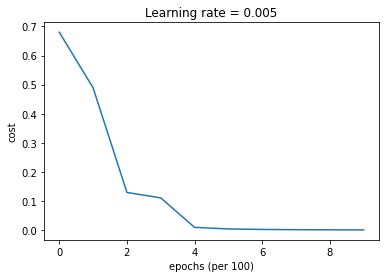

In [6]:
layers_dims = [train_x.shape[0], 30, 20, 10, 1]

parameters = ANN.train_model(train_x, train_y, layers_dims, learning_rate = 0.005, num_epochs = 1000, print_cost=True, loss="crossentropy", optimizer = "GD", decay=False)

In [7]:
pred_train = ANN.predict(train_x, train_y, parameters)
pred_test = ANN.predict(test_x, test_y, parameters)

Accuracy: 0.9999999999999998
Accuracy: 0.76


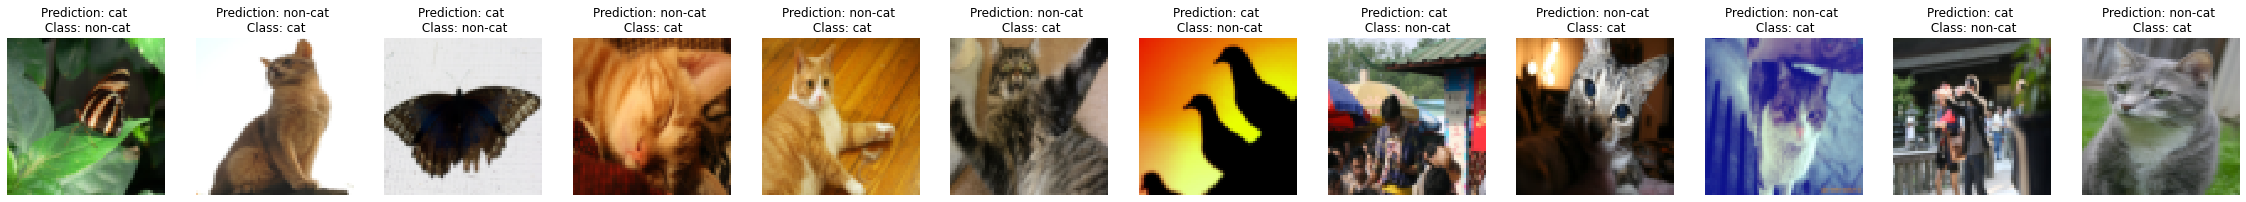

In [8]:
ANN.print_mislabeled_images(classes, test_x, test_y, pred_test)

## Now we use our NN implementation for a Regression task (adding 2 numbers)

In [0]:
def create_mse_data(low, high, m, train_test_split=0.2):

  mse_X = np.random.randint(low,high=high, size=(2,m))
  mse_X_scaled = mse_X/(high)

  mse_Y = (np.copy(mse_X[0,:])+np.copy(mse_X[1,:])).reshape(1,mse_X.shape[1])
  mse_Y_scaled = mse_Y/(high*2)

  mse_X_train = mse_X_scaled[:,0:int(m*train_test_split)]
  mse_X_test = mse_X_scaled[:,int(m*train_test_split):]
  mse_Y_train = mse_Y_scaled[:,0:int(m*train_test_split)]
  mse_Y_test = mse_Y_scaled[:,int(m*train_test_split):]

  return (mse_X_train,mse_X_test,mse_Y_train,mse_Y_test)

(mse_X_train,mse_X_test,mse_Y_train,mse_Y_test) = create_mse_data(0,50,10000)

layers_dims_mse = [mse_X_train.shape[0],20,10,1]

Cost after epoch 0: 0.009320
Cost after epoch 100: 0.000009
Cost after epoch 200: 0.000005
Cost after epoch 300: 0.000003
Cost after epoch 400: 0.000002
Cost after epoch 500: 0.000002
Cost after epoch 600: 0.000002
Cost after epoch 700: 0.000002
Cost after epoch 800: 0.000002
Cost after epoch 900: 0.000002
1.8994800485092678e-06


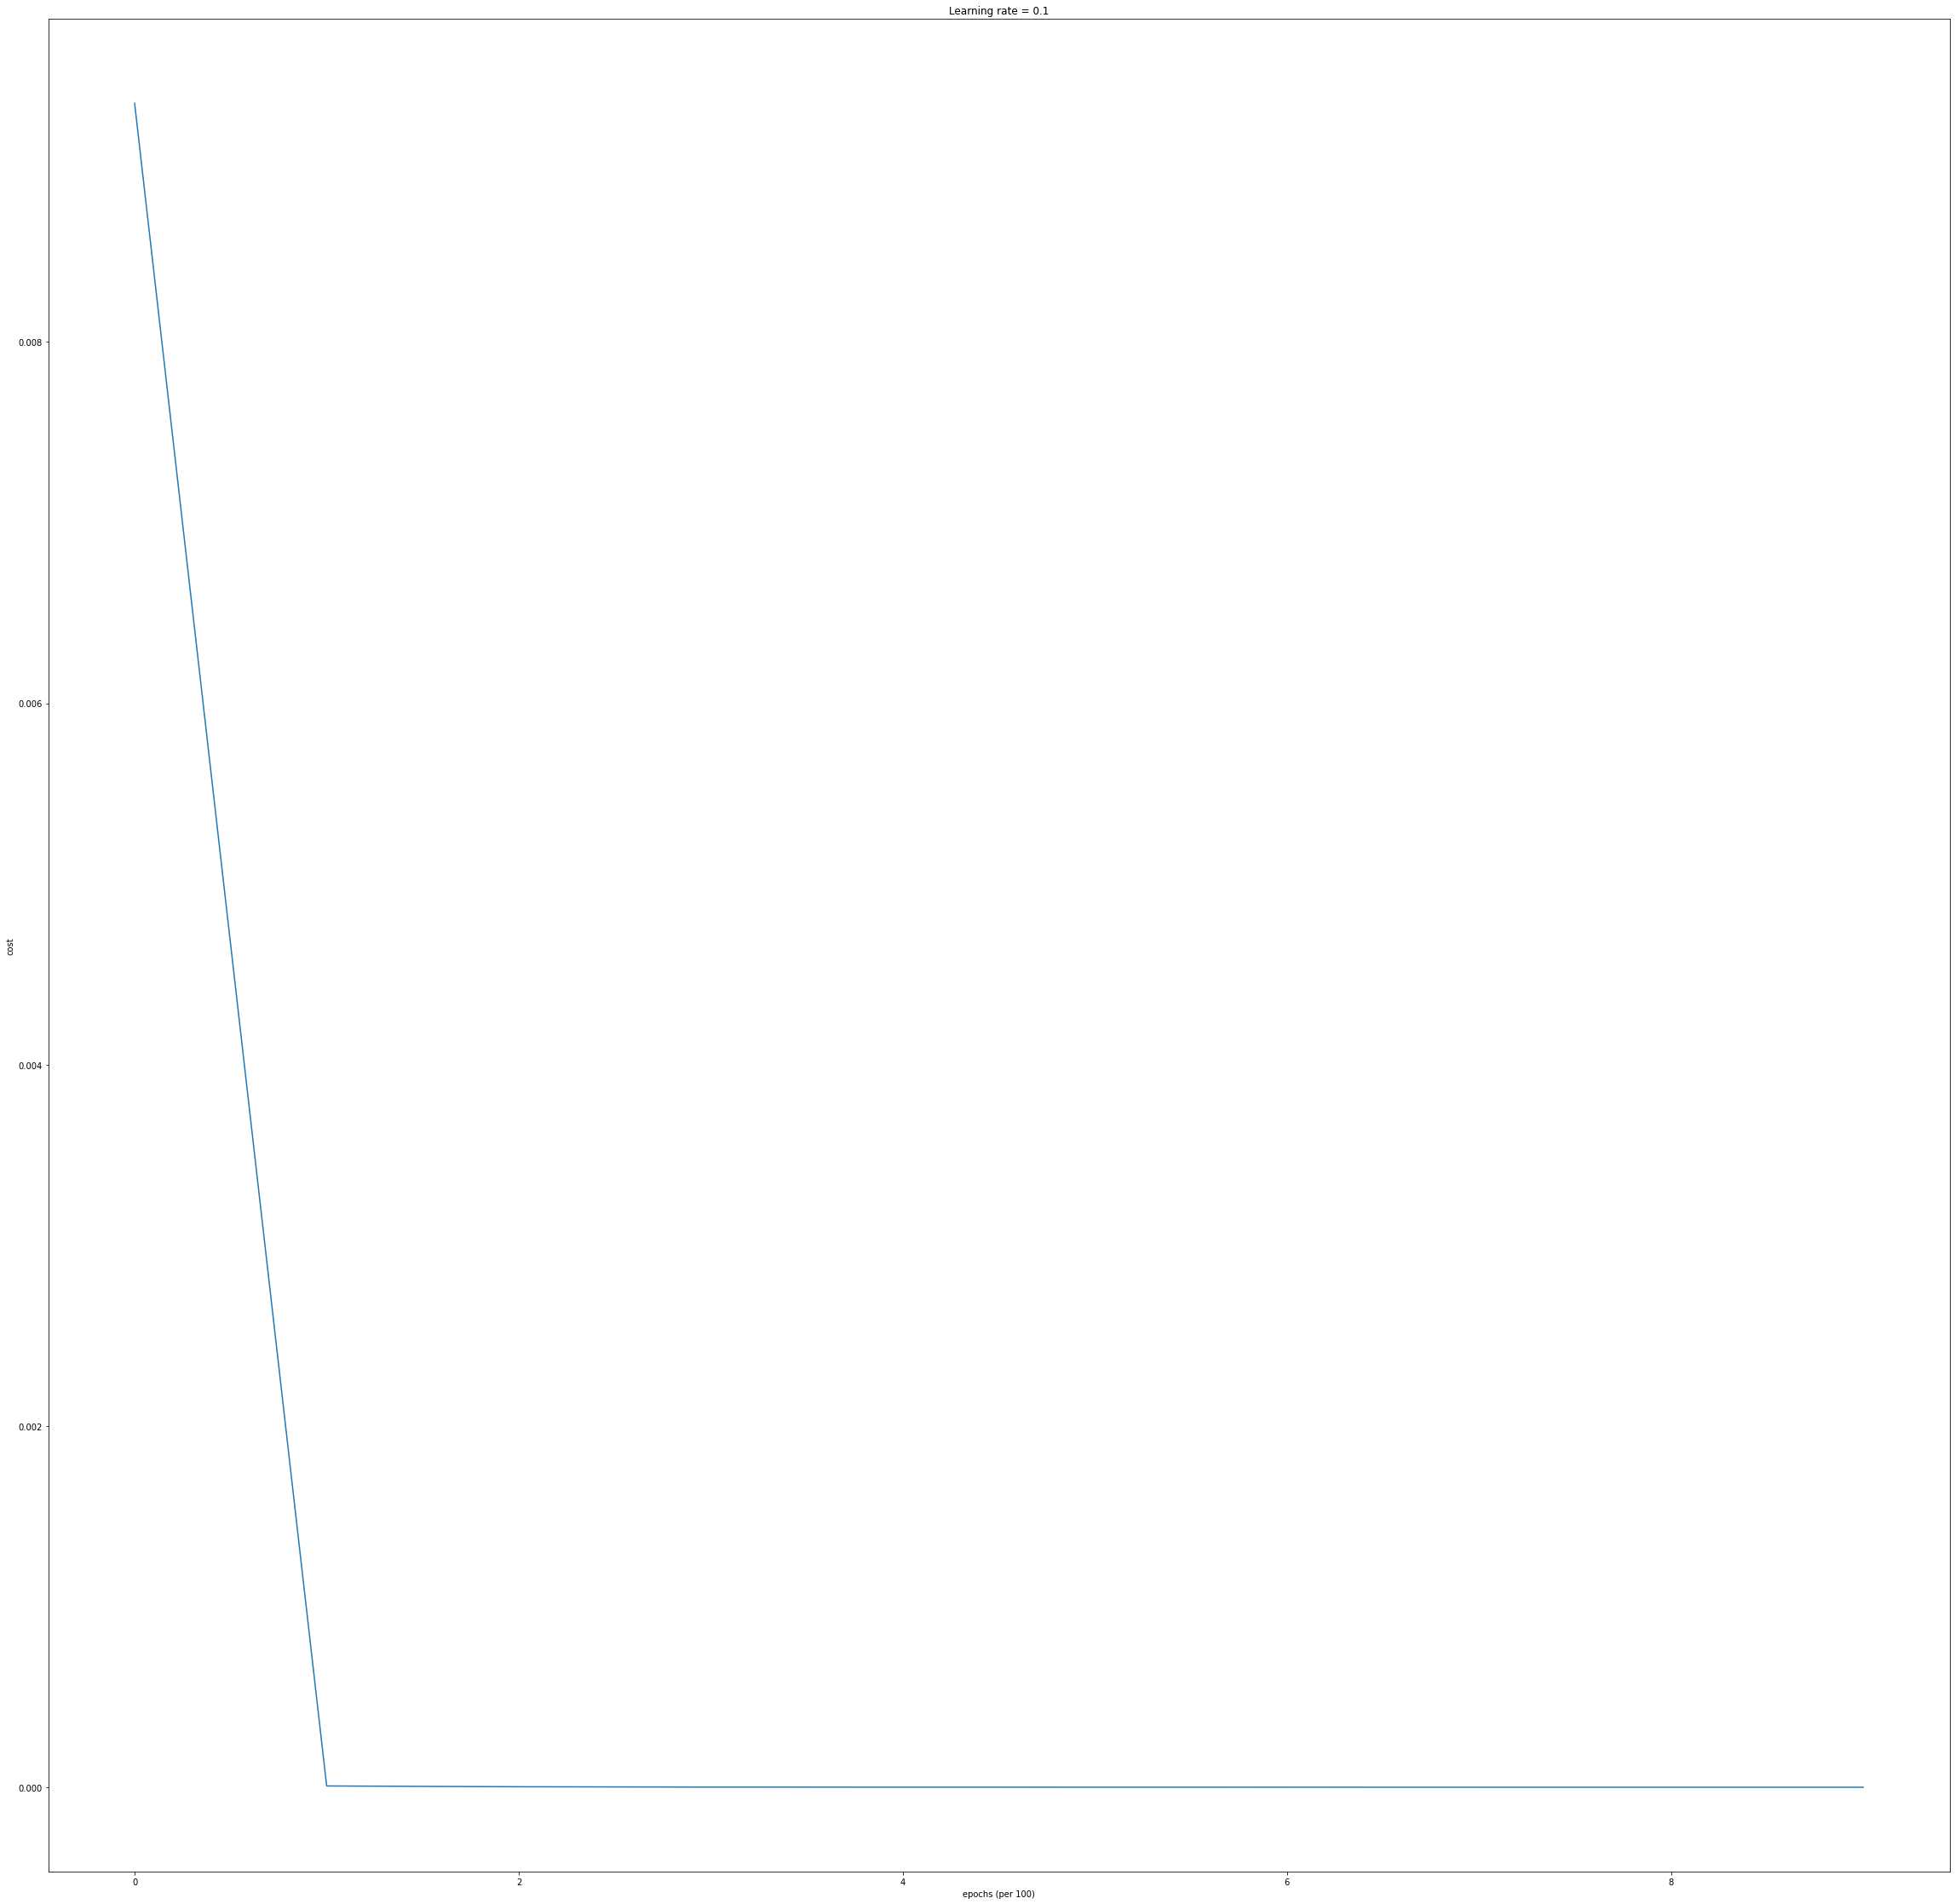

In [24]:
parameters = ANN.train_model(mse_X_train, mse_Y_train, layers_dims_mse, num_epochs = 1000, print_cost = True, loss="mse", learning_rate = 0.1, optimizer="Adam", decay_param=0.99)

In [25]:
pred_train = ANN.predict(mse_X_train, mse_Y_train, parameters, loss="mse")

p, caches = ANN.L_model_forward(mse_X_train, parameters)
print((p*100-mse_Y_train*100)[:,0:50])

Accuracy: 4.804630447045265e-08
[[ 0.52921158 -0.12760789 -0.10089939  0.0674275  -0.36771033  0.14595514
   0.08800129  0.18627871  0.05848066  0.0893734   0.07657035 -0.12995932
  -0.09409071  0.10064739  0.05045881  0.01509971  0.05848066 -0.12701827
   0.00091117  0.02026914  0.21115053  0.22083621 -0.100977    0.2174964
  -0.10778707 -0.10317219  0.08800129  0.17726673  0.12277487  0.03432644
  -0.04959473  0.08205491  0.02214695 -0.1543056  -0.16148964  0.06938702
  -0.00483079  0.29412305 -0.15784806  0.0870408  -0.04931713 -0.15733413
   0.02833109 -0.03905143 -0.04848968  0.21860972 -0.08374308  0.08553146
   0.03635075 -0.2374625 ]]


In [26]:
pred_test = ANN.predict(mse_X_test, mse_Y_test, parameters, loss="mse")

p, caches = ANN.L_model_forward(mse_X_test, parameters)

for i in range(len((mse_Y_test*100)[:, 0:10][0])):
  print(f"True Sum: {(mse_Y_test*100)[:,i]}")
  print(f"Predicted Sum: {(p*100)[:,i]}")
  print(f"Difference: {(p*100-mse_Y_test*100)[:,i]}\n")


Accuracy: 5.331793726190524e-06
True Sum: [82.]
Predicted Sum: [82.22417553]
Difference: [0.22417553]

True Sum: [64.]
Predicted Sum: [63.90759928]
Difference: [-0.09240072]

True Sum: [42.]
Predicted Sum: [41.8986114]
Difference: [-0.1013886]

True Sum: [27.]
Predicted Sum: [26.87348067]
Difference: [-0.12651933]

True Sum: [20.]
Predicted Sum: [20.10236882]
Difference: [0.10236882]

True Sum: [62.]
Predicted Sum: [62.0027701]
Difference: [0.0027701]

True Sum: [50.]
Predicted Sum: [49.99192854]
Difference: [-0.00807146]

True Sum: [41.]
Predicted Sum: [40.90641471]
Difference: [-0.09358529]

True Sum: [65.]
Predicted Sum: [64.84150953]
Difference: [-0.15849047]

True Sum: [13.]
Predicted Sum: [13.12988367]
Difference: [0.12988367]

